# Изучение рынка заведений общественного питания Москвы

- Автор: Бушмина Ольга
- Дата: 28.01.2025

### Цели и задачи проекта

Основная цель проекта - проведение исследовательского анализа рынка заведений общественного питания Москвы, в ходе которого необходимо дать ответы на конкретные вопросы заказчика, сопроводив анализ подходящими визуализациями.

### Описание данных

Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:
* `name` — название заведения;
* `address` — адрес заведения;
* `district` — административный район, в котором находится заведение, например Центральный административный округ;
* `hours` — информация о днях и часах работы;
* `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
* `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - 0 — заведение не является сетевым;
    - 1 — заведение является сетевым.
* `seats` — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:
* `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
* `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
        «Средний счёт: 1000–1500 ₽»;
        «Цена чашки капучино: 130–220 ₽»;
        «Цена бокала пива: 400–600 ₽» и так далее;
* `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
        Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
        Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
        Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
* `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
        Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
        Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
        Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт

### Содержимое проекта

1. Загрузка данных и знакомство с ними
     *  Загрузка данных
     *  Подготовка единого датафрейма
2. Проверка ошибок в данных и их предобработка  
     *  Названия столбцов
     *  Типы данных в датафрейме
     *  Уникальные значения в данных датафрейма
     *  Пропуски в датафрейме
     *  Оптимизация типов данных
     *  Проверка данных на наличие дубликатов
     *  Создание дополнительного столбца is_24_7
     *  Создание дополнительного столбца district_short
3. Исследовательский анализ данных
---

## 1. Загрузка данных и знакомство с ними


In [ ]:
# pip install phik -q 

In [2]:
# Импортируем библиотеки
import pandas as pd
#import jupyter_black

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
# Выгружаем данные в переменные bank_df и clients_df
df_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
df_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Рассмотрим данные датасета rest_info.csv — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [4]:
# Выводим первые строки датафрейма на экран
df_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим информацию о датафрейме
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


В результате первичного изучения данных  в датафрейме `df_info` можно сделать следующие выводы:
-  датасет содержит 9 столбцов, 8406 строк
-  наименования столбцов соответствуют snake case
-  столбцы `hours` и `seats` содержат пропуски
-  столбцы `id`, `name`, `category`, `address`, `district`, `hours` согласно описанию содержат строковые данные и имеют подходящий тип 'object' 
-  столбец `rating` имеет тип 'float64', подходит по описанию данных
-  столбцы `chain` и `seats` согласно описанию должны хранит целочисленные данные, возможно потребуется преобразовать тип столбца `seats`
-  значения в столбцах соответствуют описанию

Рассмотрим данные второго датасета rest_price.csv — выведем первые строки методом head(), информацию о датафрейме методом info():

In [6]:
# Выводим первые строки датафрейма на экран
df_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим информацию о датафрейме
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


В результате первичного изучения данных в датафрейме `df_price` можно сделать следующие выводы:
-  датасет содержит 5 столбцов, 4058 строк
-  наименования столбцов соответствуют snake case
-  столбцы `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup` содержат пропуски
-  столбцы `id`, `price`, `avg_bill` согласно описанию содержат строковые данные и имеют подходящий тип 'object' 
-  столбцы `middle_avg_bill` и `middle_coffee_cup` имеют тип 'float64', по описанию данных хранят чиловые значения. Возможно тип данных можно оптимизировать.
-  значения в столбцах соответствуют описанию

---

### Промежуточный вывод


Для анализа были предоставлены два датасета `rest_info.csv` и `rest_price.csv`, которые были выгружены в датафреймы `df_info` и `df_price` соответсвенно. 

Датасет `df_info` содержит 9 столбцов, 8406 строк, объем занимаемой памяти 591.2+ KB.

Датасет `df_price` содержит 5 столбцов, 4058 строк, объем занимаемой памяти 158.6+ KB.

Оба датасета содержат пропуски, которые необходимо будет обработать.

Тип хранимой информации в столбцах соответствует типам столбцов, однако можно провести оптимизацию типов данных и уменьшить объем занимаемой памяти.

### Подготовка единого датафрейма

- **Объединим данные двух датасетов в один:**

In [8]:
# Объединим два исходных датафрейма в один - df
df=df_info.merge(df_price, on='id', how='left')

In [9]:
# Выводим первые строки объединенного датафрейма на экран
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


Для объединения датафреймов использовали параметр 'left', чтобы сохранить все строки из датафрейма df_info с данными о заведениях питания, добавив к ним информацию о ценах и среднем чеке из датафрейма `df_price`. Как видно из выведенных первых строк датафрема  - объединение прошло успешно.

## 2. Предобработка данных

Подготовим данные к исследовательскому анализу:
* **Изучим названия столбцов:**

In [10]:
# Выводим названия столбцов датафрейма df
df.columns

Index(['id', 'name', 'category', 'address', 'district', 'hours', 'rating',
       'chain', 'seats', 'price', 'avg_bill', 'middle_avg_bill',
       'middle_coffee_cup'],
      dtype='object')

Названия столбцов соответствуют стилю snake_case, корректировка не требуется.

* **Изучим типы данных в датафрейме df:**

In [11]:
# Выводим типы данных столбцов датафрейма и общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


В столбце `seats` согласно описанию хранится число посадочных мест, тип данных стоит заменить на целочисленный. 
В столбцах `middle_avg_bill` и `middle_coffee_cup` хранятся числовые значения, возможно также только целые, стоит подробнее изучить данные для принятия решения замены типа на целочисленный. 

Данные всех остальных столбцов, представленных типом object, хранят строковые данные, преобразования не требуют. Вещественный и целочисленный типы данных можно попробовать оптимизировать.


* **Изучим уникальные значения в данных датафрейма df:**

In [12]:
# Проверяем уникальные значения в столбцах с числовыми данными: 

for column in ['rating', 'chain', 'seats', 'middle_avg_bill', 'middle_coffee_cup']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце rating:
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5. ]

Уникальные значения в столбце chain:
[0 1]

Уникальные значения в столбце seats:
[0.000e+00 1.000e+00 2.000e+00 3.000e+00 4.000e+00 5.000e+00 6.000e+00
 7.000e+00 8.000e+00 9.000e+00 1.000e+01 1.200e+01 1.300e+01 1.400e+01
 1.500e+01 1.600e+01 1.700e+01 1.800e+01 1.900e+01 2.000e+01 2.100e+01
 2.200e+01 2.400e+01 2.500e+01 2.600e+01 2.700e+01 2.800e+01 2.900e+01
 3.000e+01 3.200e+01 3.300e+01 3.400e+01 3.500e+01 3.600e+01 3.700e+01
 3.800e+01 3.900e+01 4.000e+01 4.100e+01 4.200e+01 4.300e+01 4.400e+01
 4.500e+01 4.600e+01 4.700e+01 4.800e+01 4.900e+01 5.000e+01 5.100e+01
 5.200e+01 5.300e+01 5.400e+01 5.500e+01 5.600e+01 5.800e+01 6.000e+01
 6.100e+01 6.200e+01 6.300e+01 6.400e+01 6.500e+01 6.600e+01 6.700e+01
 6.800e+01 6.900e+01 7.000e+01 7.200e+01 7.400e+01 7.500e+01 7.600e+01
 7

Обзор уникальных значений числовых столбцов позволяет сделать вывод: столбцы `seats`, `middle_avg_bill`, `middle_coffee_cup` можно привести к целочисленному типу, однако наличие пропусков не позволяет это сделать сразу. 

In [13]:
# Преобразуем тип столбца 'seats' без обработки пропусков заглушками и проверим новый тип 
# df['seats'] = df['seats'].astype('Int64')
# df['seats'].dtype

Столбцы `rating` и `chain` хранят данные подходящего типа, изменение типа не требуется. 

* **Изучим пропуски в данных датафрейма df:**

При первичном анализе мы обнаружили пропуски в столбцах числового типа `seats`, `middle_avg_bill`, `middle_coffee_cup`, а также в столбцах типа object `hours`, `price`, `avg_bill`. Узнаем абсолютное и относительное количество пропусков в этих столбцах.

In [14]:
# Применяем метод isna() к датафрейму df
missing_values = df.isna().sum().to_frame('missing_values').sort_values(by='missing_values')

# добавляем цвет
df_miss=missing_values.style.background_gradient(cmap='crest', axis=0).format("{:.2f}")
display(df_miss)

,missing_values
id,0.00
name,0.00
category,0.00
address,0.00
district,0.00
rating,0.00
chain,0.00
hours,536.00
seats,3611.00
avg_bill,4590.00


In [15]:
# Подсчитываем процент строк с пропусками
missing_values_prop = (df.isna().sum() / df.shape[0] * 100).to_frame('missing_values').sort_values(by='missing_values')
# добавляем цвет
df_miss_prop=missing_values_prop.style.background_gradient(cmap='crest', axis=0).format("{:.2f}")
display(df_miss_prop)

,missing_values
id,0.00
name,0.00
category,0.00
address,0.00
district,0.00
rating,0.00
chain,0.00
hours,6.38
seats,42.96
avg_bill,54.60


Количество пропусков слишком большое, чтобы просто их удалить. 
Используем замену на индикаторное значение. Для числовых столбцов в качестве индикатора выберем значение `-10`, для строковых значений - `нет данных`, убедившись, что эти значения не встречаются в данных.

Столбцы middle_avg_bill и middle_coffee_cup заполняются на основе столбца avg_bill, поэтому большое количество пропусков в них объясняется незаполненным столбцом avg_bill. Так данные основаны на открытых источниках, зачастую заполнялись пользователями, то пропуски в сложных для заполнения текстовых полях, ожидаемы.

In [16]:
# Заменим пропуски в числовых столбцах на значение -10
for column in ['seats', 'middle_avg_bill', 'middle_coffee_cup']:
    df[column] = df[column].fillna(-10)

In [17]:
# Заменим пропуски в нечисловых столбцах на значение `нет данных`
for column in ['hours', 'avg_bill', 'price']:
    df[column] = df[column].fillna('нет данных')

In [18]:
# Проверим результат замены значений
df.isna().sum()

id                   0
name                 0
category             0
address              0
district             0
hours                0
rating               0
chain                0
seats                0
price                0
avg_bill             0
middle_avg_bill      0
middle_coffee_cup    0
dtype: int64

Как видим - пропуски в датафрейме отсутствуют.

* **Оптимизируем типы данных:**

Можем вернуться к оптимизации типов данных. Переведем столбцы `seats`, `middle_avg_bill`, `middle_coffee_cup` в целочисленный тип:

In [19]:
# Преобразовываем типы данных с понижением разрядности
for column in ['seats', 'middle_avg_bill', 'middle_coffee_cup', 'chain']:
    df[column] = pd.to_numeric(df[column], downcast='integer')

In [20]:
# Оптимизируем тип float64 данных в датафрейме df
df['rating'] = pd.to_numeric(df['rating'],downcast='float')

In [21]:
# Проверим результат преобразования:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              8406 non-null   int16  
 9   price              8406 non-null   object 
 10  avg_bill           8406 non-null   object 
 11  middle_avg_bill    8406 non-null   int32  
 12  middle_coffee_cup  8406 non-null   int16  
dtypes: float32(1), int16(2), int32(1), int8(1), object(8)
memory usage: 697.8+ KB


Типы данных были успешно оптимизированы с понижением размерности данных, пропуски обработаны.

* **Проверим данные на наличие дубликатов:**

По специфике хранимых данных можно предположить наличие неявных дубликатов в столбцах `district`, `category`. Проверим данные в этих столбцах на опечатки, синонимы и пр.

In [22]:
# Выведем уникальные значения столбцов district, category
for column in ['district', 'category']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']



Дублирования значений по столбцам district, category не выявлено.

Далее наличие дубликатов можно предеположить в парах по столбцам `name` и `address`. Для поиска дубликатов выполним нормализацию значений: приведем их к нижнему регистру и удалим лишние пробелы:

In [23]:
# Приведем все значения столбцов 'name' и 'address' к нижнему регистру:
df['name'] = df['name'].str.lower()
df['address'] = df['address'].str.lower()

In [24]:
# Удалим пробелы с начала и конца, а так же внутри строки
for column in ['name', 'address']:
    df[column] = df[column].str.strip()
    df[column] = df[column].str.split().str.join(" ")

In [25]:
# Проверим наличие дубликатов в парах 'name' и 'address'
duplicates = df[df.duplicated(subset=['name', 'address'], keep=False)]
print("Всего строк в датафрейме: ", df.shape[0])
print("Найдено дубликатов: ", df.duplicated(subset=['name', 'address']).sum())
display(duplicates)

Всего строк в датафрейме:  8406
Найдено дубликатов:  4


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,-10,нет данных,нет данных,-10,-10
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,-10,нет данных,нет данных,-10,-10
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188,нет данных,нет данных,-10,-10
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188,нет данных,нет данных,-10,-10
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150,нет данных,нет данных,-10,-10
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150,нет данных,нет данных,-10,-10
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276,нет данных,нет данных,-10,-10
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,нет данных,4.1,0,276,нет данных,нет данных,-10,-10


In [26]:
# Удаляем дубликаты:
df = df.drop_duplicates(subset=['name', 'address'])
print("Всего строк в датафрейме: ", df.shape[0])

Всего строк в датафрейме:  8402


Таким образом были выявлены и удалены 4 строки-дубликата.

* **Создание дополнительного столбца `is_24_7`:**

Создадим столбец `is_24_7`, содержащий флаг работы заведения 24/7:
- логическое значение True — если заведение работает ежедневно и круглосуточно;
- логическое значение False — в противоположном случае.


In [27]:
# Значение True присваиваем, если в столбце hours значение 'ежедневно, круглосуточно', иначе - False
# Проверка на наличие обоих слов
contains_daily = df['hours'].str.contains('ежедневно', na=False)
contains_24_7 = df['hours'].str.contains('круглосуточно', na=False)

# Объединение условий
df['is_24_7'] = contains_daily & contains_24_7 

In [28]:
# Для проверки создания столбца выведем датафрейм
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-10,нет данных,нет данных,-10,-10,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550,-10,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000,-10,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-10,нет данных,Цена чашки капучино:155–185 ₽,-10,170,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500,-10,False


* **Создание дополнительного столбца `district_short`:**

Создадим дополнительный столбец `district_short` с сокращенными названиями округов, чтобы далее визуализации смотрелись аккуратнее и понятнее.

In [29]:
# Словарь для замены
district_map = {
    'Восточный административный округ': 'ВАО',
    'Западный административный округ': 'ЗАО',
    'Северный административный округ': 'САО',
    'Северо-Восточный административный округ': 'СВАО',
    'Северо-Западный административный округ': 'СЗАО',
    'Центральный административный округ': 'ЦАО',
    'Юго-Восточный административный округ': 'ЮВАО',
    'Юго-Западный административный округ': 'ЮЗАО',
    'Южный административный округ': 'ЮАО',
}

# Преобразование столбца
df['district_short'] = df['district'].map(district_map)

In [30]:
# Для проверки создания столбца выведем датафрейм
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7,district_short
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-10,нет данных,нет данных,-10,-10,False,САО
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550,-10,False,САО
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000,-10,False,САО
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-10,нет данных,Цена чашки капучино:155–185 ₽,-10,170,False,САО
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500,-10,False,САО


---

### Промежуточный вывод

Посмотрим на итоговый датафрейм после проведенной предобработки данных:

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              8402 non-null   object 
 6   rating             8402 non-null   float32
 7   chain              8402 non-null   int8   
 8   seats              8402 non-null   int16  
 9   price              8402 non-null   object 
 10  avg_bill           8402 non-null   object 
 11  middle_avg_bill    8402 non-null   int32  
 12  middle_coffee_cup  8402 non-null   int16  
 13  is_24_7            8402 non-null   bool   
 14  district_short     8402 non-null   object 
dtypes: bool(1), float32(1), int16(2), int32(1), int8(1), object(9)
memory us

**В результате проведенной работы было:**
* удалены 4 дублирующие строки
* оптимизированы по размерности 5 столбцов
* ни один столбец больше не содержит пропусков
* объем занимаемой памяти сократился
* добавлены два стобца - `is_24_7`, `district_short`, которые понадобятся в дальнейшем при исследовательском анализе данных

## 3. Исследовательский анализ данных


---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [32]:
# Сгруппируем данные по категории заведения и подсичтаем количество объектов в каждой категории
print('Количество объектов питания в каждой категории:')
df['category'].value_counts() 

Количество объектов питания в каждой категории:


кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

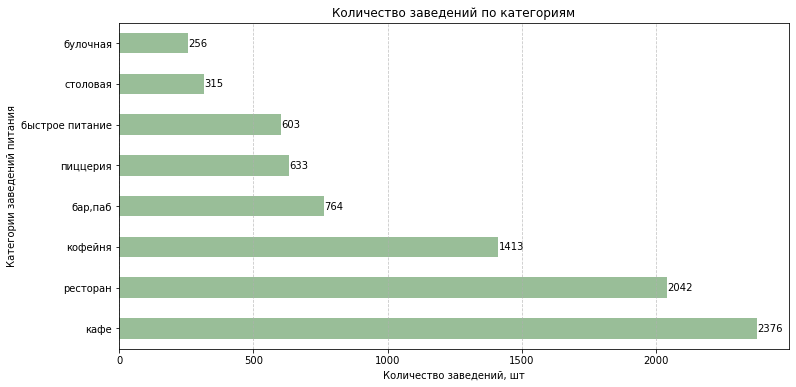

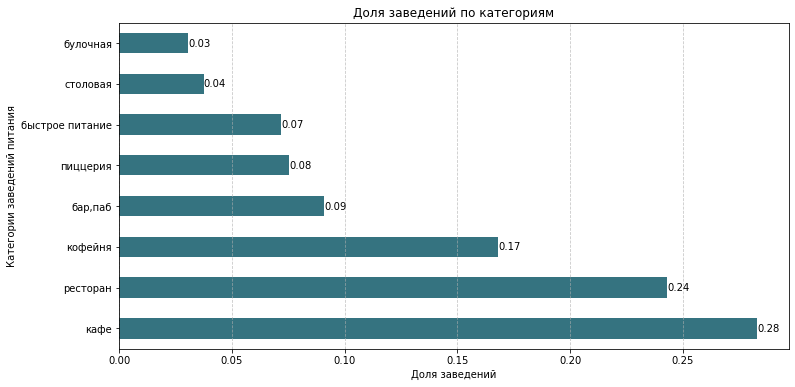

In [33]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12,6))

# Строим линейчатую диаграмму
df['category'].value_counts().plot(kind='barh', legend=False, color='#99BE98')

# Настраиваем график с помощью библиотеки matplotlib
plt.title('Количество заведений по категориям')
plt.xlabel('Количество заведений, шт')
plt.ylabel('Категории заведений питания')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Добавляем подписи значений
for index, value in enumerate(df['category'].value_counts()):
    plt.text(value+1, index, str(value), va='center')

plt.show()

plt.figure(figsize=(12,6))
df['category'].value_counts(normalize=True).plot(kind='barh', legend=False, color='#357380')

# Настраиваем график с помощью библиотеки matplotlib
plt.title('Доля заведений по категориям')
plt.xlabel('Доля заведений')
plt.ylabel('Категории заведений питания')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Добавляем подписи значений
for index, value in enumerate(df['category'].value_counts(normalize=True)):
    plt.text(value, index, str(round(value,2)), va='center')

plt.show()

Провели подсчет количества заведений в каждой из представленных в данных категории объектов общественного питания. Для визуализации используем линейчатую диаграмму.

В данных представлены 8 категорий заведений общепита. Больше всего объектов категории "кафе" - 2376 шт, на втором месте "ресторан" - 2042 шт. Меньше всего заведений типа "булочная"- 256 шт и "столовая" - 315 шт.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [34]:
# Сгруппируем данные по районам Москвы и подсичтаем количество объектов в каждом районе
print('Количество объектов питания по административным районам Москвы:')
df['district'].value_counts() 

Количество объектов питания по административным районам Москвы:


Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

In [35]:
# Сгруппируем данные по категории заведения в ЦАО 
print('Распределение объектов питания в ЦАО по категориям:')
df_cao = df[df['district'] == 'Центральный административный округ']
df_cao['category'].value_counts() 

Распределение объектов питания в ЦАО по категориям:


ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

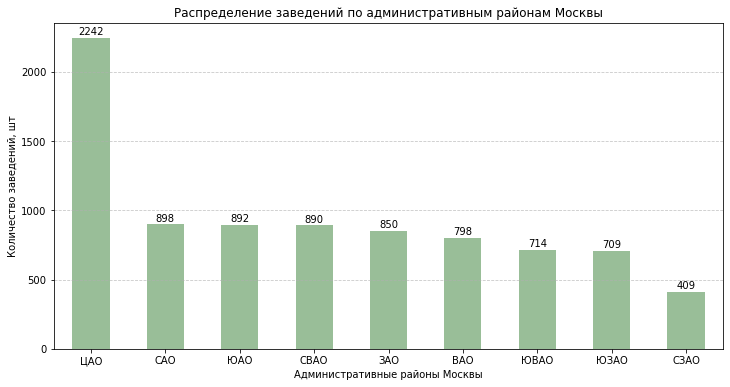

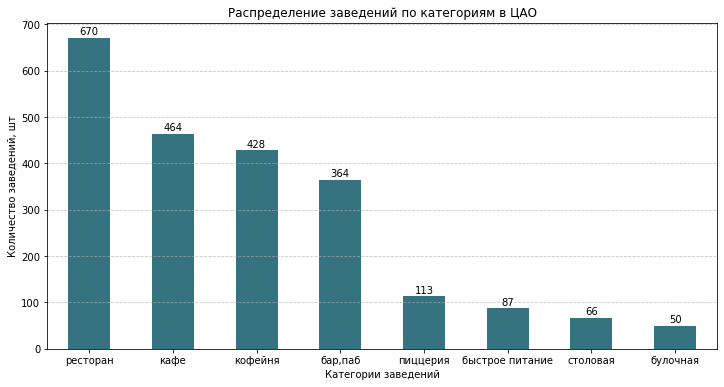

In [36]:
# Создаём контейнер графика №1
plt.figure(figsize=(12,6))

# Строим солбчатую диаграмму
df['district_short'].value_counts().plot(kind='bar', legend=False, rot=0, color='#99BE98')

# Настраиваем график с помощью библиотеки matplotlib
plt.title('Распределение заведений по административным районам Москвы')
plt.xlabel('Административные районы Москвы')
plt.ylabel('Количество заведений, шт')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем подписи значений
for index, value in enumerate(df['district_short'].value_counts()):
    plt.text(index, value+10, str(value), ha='center', va='bottom')
    
plt.show()

# Создаём контейнер графика №2
plt.figure(figsize=(12,6))

# Строим столбчатую диаграмму
df_cao['category'].value_counts().plot(kind='bar', legend=False, rot=0, color='#357380')

# Настраиваем график с помощью библиотеки matplotlib
plt.title('Распределение заведений по категориям в ЦАО')
plt.xlabel('Категории заведений')
plt.ylabel('Количество заведений, шт')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем подписи значений
for index, value in enumerate(df_cao['category'].value_counts()):
    plt.text(index, value+3, str(value), ha='center', va='bottom')

plt.show()


В данных представлены 9 административных округов г.Москва. Наибольшее количество заведений общепита расположено в ЦАО - 2242 объекта, что более чем в 2 раза превышает количество заведений в других округах. Наименьшее число заведений общественного питания расположено в Северо-Западном административном округе - 409. В остальных 7 округах количество объектов общепита примерно равное - от 709 до 898 точек.

Изучение распределения заведений по категориям в Центральном административном округе Москвы показало, что больше всего представлена категория "ресторан" - 670 объектов (что отличается от распределения в целом по городу, где мы видели "кафе" как самую популярную категории общепита). Далее можно выделить две группы по количеству заведений в них: "бар, паб", "кофейня", "кафе" - от 364 до 464 точек и "булочная", "столовая", "быстрое питание", "пиццерия" - от 50 до 113 точек.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [37]:
# Рассчитаем количество несетевых и сетевых заведений
print('Количество несетевых и сетевых заведений по всем данным:')
df['chain'].value_counts()

Количество несетевых и сетевых заведений по всем данным:


0    5199
1    3203
Name: chain, dtype: int64

In [38]:
# Рассчитаем доли несетевых и сетевых заведений
data_chain = df['chain'].value_counts(normalize=True).round(2) 
display(data_chain)

0    0.62
1    0.38
Name: chain, dtype: float64

In [39]:
# Рассчитаем доли несетевых и сетевых заведений в разрезе категории
print('Доли несетевых и сетевых заведений в разрезе категории:')
df_grouped_chain = df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value = 0).round(2).sort_values(1)
display(df_grouped_chain)

Доли несетевых и сетевых заведений в разрезе категории:


chain,0,1
category,,
"бар,паб",0.78,0.22
столовая,0.72,0.28
кафе,0.67,0.33
ресторан,0.64,0.36
быстрое питание,0.62,0.38
кофейня,0.49,0.51
пиццерия,0.48,0.52
булочная,0.39,0.61


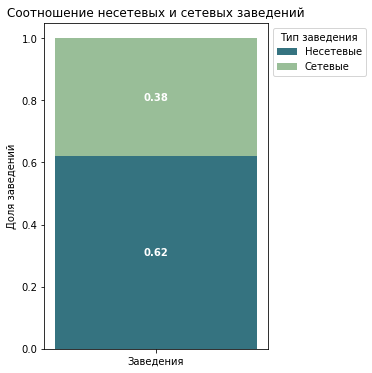

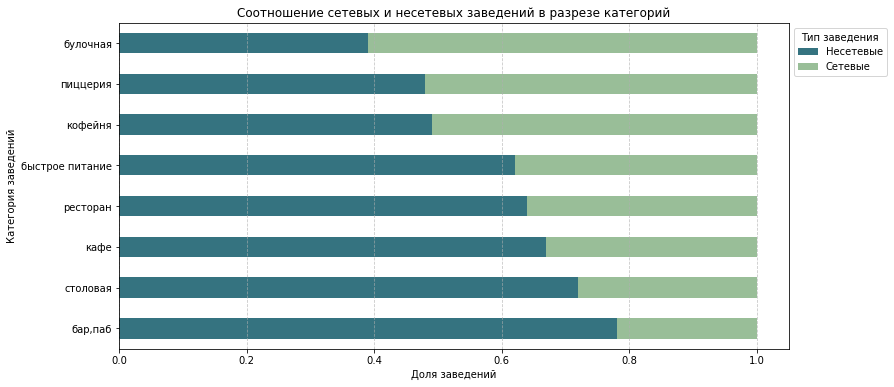

In [40]:
# Строим столбчатую диаграмму доли сетевых заведений в целом

plt.figure(figsize=(4, 6))

plt.bar(['Заведения'], [data_chain[0]], label='Несетевые',color='#357380')
plt.bar(['Заведения'], [data_chain[1]], bottom=[data_chain[0]], label='Сетевые', color='#99BE98')

# Подписываем значения долей на столбце
plt.text(0, data_chain[0] / 2, f"{data_chain[0]:.2f}", ha='center', va='center', color='white', fontsize=10, fontweight='bold')
plt.text(0, data_chain[0] + data_chain[1] / 2, f"{data_chain[1]:.2f}", ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Настраиваем график
plt.title('Соотношение несетевых и сетевых заведений')
plt.ylabel('Доля заведений')
plt.legend(title="Тип заведения", loc='upper left', bbox_to_anchor=(1, 1))

# Отображаем график
plt.show()


df_grouped_chain.plot(kind='barh',
                                 stacked=True,
                                 figsize=(12, 6),
                                 title='Соотношение сетевых и несетевых заведений в разрезе категорий',
                                 color=['#357380','#99BE98'],
                                 rot=0)

plt.legend(title="Тип заведения", loc='upper left', bbox_to_anchor=(1, 1), labels=['Несетевые', 'Сетевые'])
plt.ylabel('Категория заведений')
plt.xlabel('Доля заведений')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
# Отображаем график
plt.show()

В результате изучения данных и диаграмм можем сделать следующие выводы:
* сетевых заведений в целом меньше примерно на 30%
* в категориях "рестораны" и "быстрое питание" доли сетевых и несетевых заяведений соответствуют общему распределению
* в категориях "кофейня", "пиццерия", "булочная" доля сетевых заведений выше, чем несетевых

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

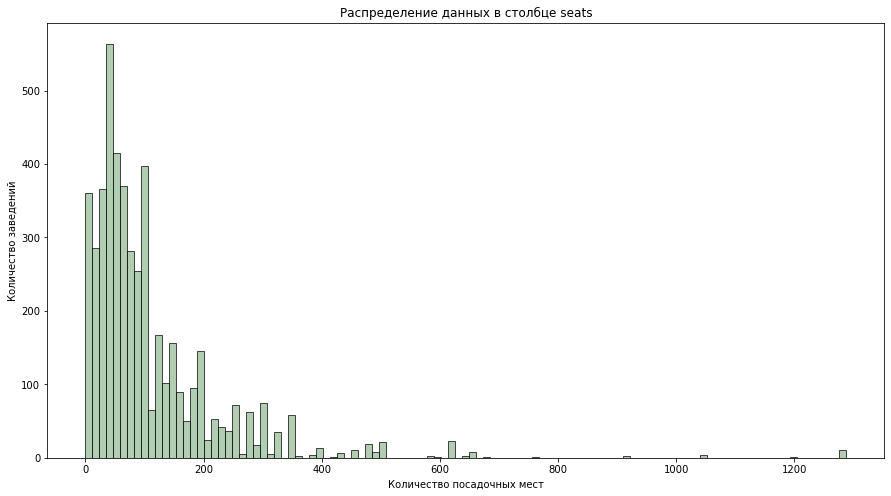

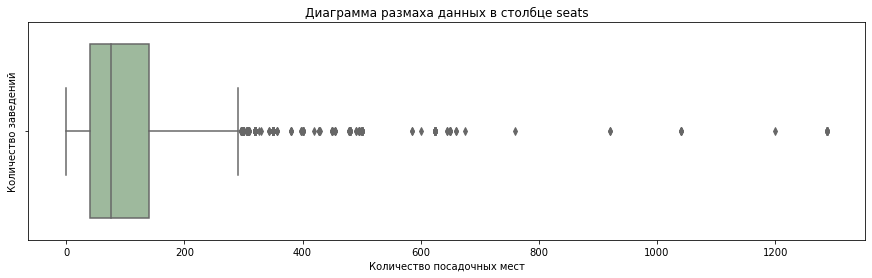

In [41]:
# Отфильтруем пропуски, замененные на индикатор -10
df_filtered = df[df['seats'] != -10]
plt.figure(figsize=(15, 8))

# Посмотрим статистики  по столбцу "seats"
display(df_filtered['seats'].describe())

# Строим гистограмму
sns.histplot(data=df_filtered, x='seats', color='#99BE98')

# Подписываем и отображаем гистограмму
plt.title('Распределение данных в столбце seats')
plt.ylabel('Количество заведений')
plt.xlabel('Количество посадочных мест')
plt.show()

plt.figure(figsize=(15, 4))

# Строим и отображаем диаграмму размаха
sns.boxplot(x='seats', data=df_filtered, color='#99BE98')
plt.title('Диаграмма размаха данных в столбце seats')
plt.ylabel('Количество заведений')
plt.xlabel('Количество посадочных мест')
plt.show()

Как видно из графика распределения и диаграммы размаха большинство завведний имеет количество посадочных мест до 100. Распределение имеет выраженный правый хвост, некоторые заведения имеют аномально большое количество посадочных мест - более  600  и даже более 1200 - выбросы.

Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест.

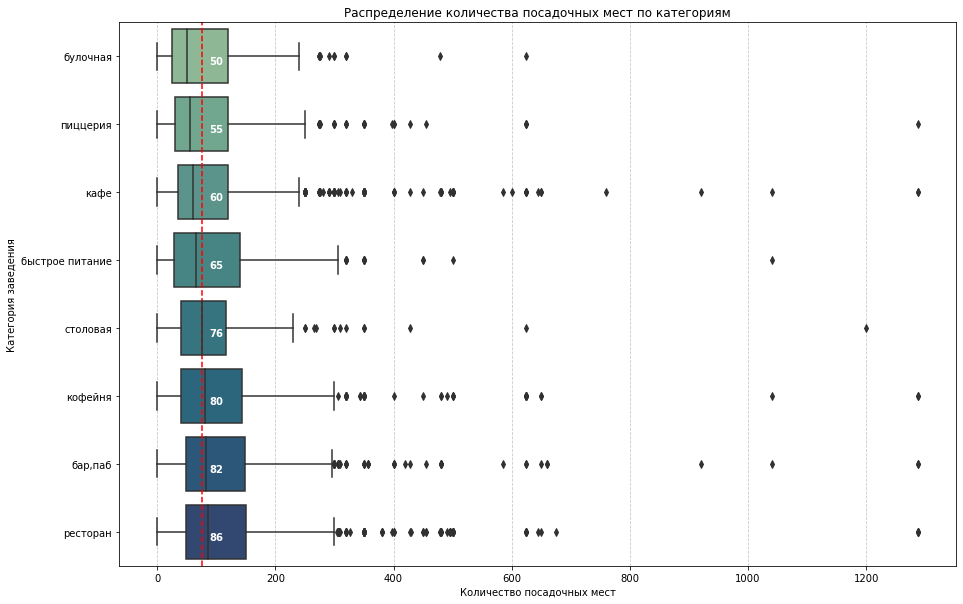

In [42]:
# Рассчитываем медиану для каждой категории
medians = df_filtered.groupby("category")["seats"].median().sort_values()
# Сортируем категории по медиане
sorted_categories = medians.sort_values().index

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_filtered, x='seats', y='category', palette="crest", order=sorted_categories)
plt.title('Распределение количества посадочных мест по категориям')
plt.ylabel('Категория заведения')
plt.xlabel('Количество посадочных мест')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Добавляем подписи медиан на график
for i, median in enumerate(medians):
    plt.text(100, i, f'{median:.0f}', color='white', ha='center', va='top', fontsize=10,fontweight='bold')


# Рассчитываем медиану посадочных мест по всем заведениям в целом:
median_seats = df_filtered['seats'].quantile(0.5)

# Выводим на графике линию медианы по всем данным
plt.axvline(median_seats, color='red', linestyle='--')
plt.show()

На графике отображены разбросы количества посадочных мест для каждой категории и выведены значения медиан как наиболее типичных для категории количества мест.
Наиболее низкие медианы у булочных и пиццерий, т.е. эти заведения имеют в среднем меньше всего посадочных мест.
Медиана столовых соответствует медиане в целом по данным.
Самые большие залы имеют рестораны, бары(пабы) и кофейни. Для категории "кофейня" такое большое количество посадочных мест едва ли характерно. Возможно выбросы в данных появились в результате ошибки. Этот вопрос следует рассмотреть отдельно.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [43]:
# Рассчитаем и выведем средний рейтинг по всем заведениям в целом:
mean_rating =  round(df['rating'].mean(), 2)
print("Общий средний рейтинг = ", mean_rating)

# Рассчитаем и выведем средний рейтинг заведений по категориям
df_grouped_rating = df.groupby('category')['rating'].mean().round(2).sort_values(ascending=False)
display(df_grouped_rating)

Общий средний рейтинг =  4.23


category
бар,паб            4.39
пиццерия           4.30
ресторан           4.29
кофейня            4.28
булочная           4.27
столовая           4.21
кафе               4.12
быстрое питание    4.05
Name: rating, dtype: float32

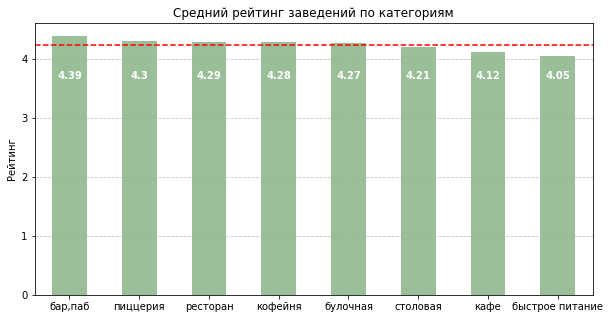

In [44]:
# Строим столбчатую диаграмму
df_grouped_rating.plot(kind='bar',
                figsize=(10, 5),
                title='Средний рейтинг заведений по категориям',
                ylabel='Рейтинг',
                xlabel='',
                color='#99BE98',
                rot=0  
               )
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем подписи над столбцами
for i, value in enumerate(df_grouped_rating):
    plt.text(i, 3.8, str(round(value, 2)),color='white', ha='center', va='top', fontsize=10, fontweight='bold')

# Выводим на графике линию среднего рейтинга по всем данным
plt.axhline(
    mean_rating,
    color="red",
    linestyle="--",
)
# Отображаем график
plt.show()

Изучение средних рейтингов заведений по категориям показало малое изменение значений между категориями.
Т.е. средний рейтинг заведний в целом незначительно отличается от среднего рейтинга для разных видов общепита.

Отклонения рейтингов по категориям от общей линии среднего значения малы. 

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

,category,district,chain,seats,price,is_24_7,rating
category,1.000000,0.138176,0.243605,0.040970,0.558689,0.143307,0.188884
district,0.138176,1.000000,0.053285,0.241456,0.196657,0.063407,0.276956
chain,0.243605,0.053285,1.000000,0.069581,0.212767,0.000000,0.065368
seats,0.040970,0.241456,0.069581,1.000000,0.088146,0.061662,0.000000
price,0.558689,0.196657,0.212767,0.088146,1.000000,0.017489,0.257868
is_24_7,0.143307,0.063407,0.000000,0.061662,0.017489,1.000000,0.088509
rating,0.188884,0.276956,0.065368,0.000000,0.257868,0.088509,1.000000


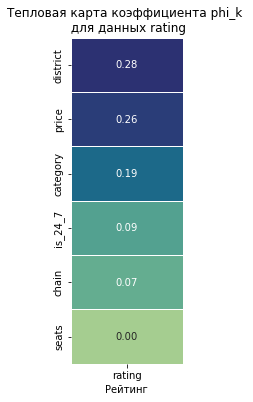

In [45]:
# Отфильтруем пропуски, замененные на индикаторы -10 и нет данных
df_filtered_phik = df[(df['seats'] != -10)&(df['price'] != 'нет данных')]

# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df_filtered_phik[['category','district','chain','seats','price','is_24_7','rating']].phik_matrix(interval_cols=['seats', 'rating'])
display(correlation_matrix)


plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками заведения
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

# Строим тепловую карту
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='crest', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг')

# Выводим график
plt.show() 

Мы видим наибольшую корреляцию рейтинга заведения с районом расположения (0.28) и ценовой категорией (0.26).

На основе этих данных можно предположить, что при рассмотрении рейтинга в разрезе районов и ценовой категории мы увидим более высокие значения рейтинга для более высоких цен и престижных районов.

In [46]:

# Рассчитаем и выведем средний рейтинг заведений по районам
df_grouped_rating_district = df_filtered_phik.groupby('district_short')['rating'].mean().round(2).sort_values(ascending=False)
display(df_grouped_rating_district)
# Рассчитаем и выведем средний рейтинг заведений по ценовой политике заведения
df_grouped_rating_price = df_filtered_phik.groupby('price')['rating'].mean().round(2).sort_values(ascending=False)
display(df_grouped_rating_price)

district_short
ЦАО     4.42
ЮЗАО    4.31
САО     4.30
ВАО     4.29
СЗАО    4.29
ЗАО     4.28
ЮВАО    4.28
ЮАО     4.27
СВАО    4.26
Name: rating, dtype: float32

price
высокие          4.44
выше среднего    4.38
средние          4.30
низкие           4.20
Name: rating, dtype: float32

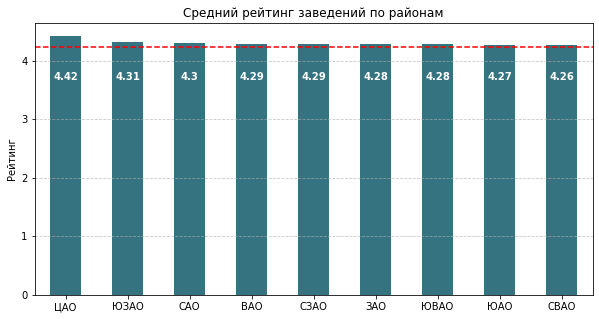

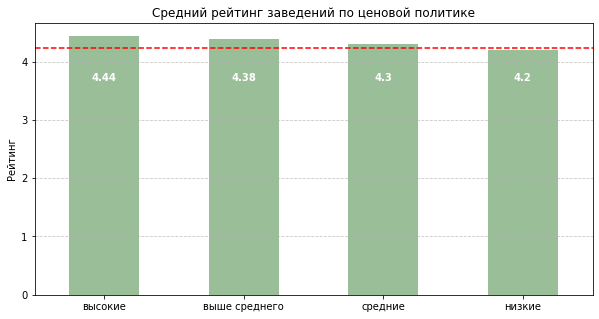

In [47]:
# Строим столбчатую диаграмму зависимости рейтинга от района
df_grouped_rating_district.plot(kind='bar',
                figsize=(10, 5),
                title='Средний рейтинг заведений по районам',
                ylabel='Рейтинг',
                xlabel='',
                color='#357380',
                rot=0  
               )
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем подписи над столбцами
for i, value in enumerate(df_grouped_rating_district):
    plt.text(i, 3.8, str(round(value, 2)),color='white', ha='center', va='top', fontsize=10, fontweight='bold')

# Выводим на графике линию среднего рейтинга по всем данным
plt.axhline(
    mean_rating,
    color="red",
    linestyle="--",
)
# Отображаем график
plt.show()

# Строим столбчатую диаграмму зависимости рейтинга от ценовой категории
df_grouped_rating_price.plot(kind='bar',
                figsize=(10, 5),
                title='Средний рейтинг заведений по ценовой политике',
                ylabel='Рейтинг',
                xlabel='',
                color='#99BE98',
                rot=0  
               )
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем подписи над столбцами
for i, value in enumerate(df_grouped_rating_price):
    plt.text(i, 3.8, str(round(value, 2)),color='white', ha='center', va='top', fontsize=10, fontweight='bold')

# Выводим на графике линию среднего рейтинга по всем данным
plt.axhline(
    mean_rating,
    color="red",
    linestyle="--",
)
# Отображаем график
plt.show()

После изучения диаграмм гипотезу можно считать подтвердившейся: действительно средний рейтинг заведений с более высокими ценами выше остальных категорий заведений и выше среднего рейтинга по всем данным. Так же рейтинг заведний в ЦАО (самом престижном районе) вышеретийнга заведний других районов.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [48]:
# Выбираем только сетевые заведения
df_filtered_chain = df[df['chain'] == 1]

# Из них выполняем группировку по названию, вычисляя количество заведений с таким именем и их средний рейтинг
df_grouped_name = df_filtered_chain.groupby(['name','category']).agg(
                                          name_df=('name','min'),
                                          count_by_name=('id','count')    
                                         ).sort_values(by=['count_by_name'], ascending = False).head(15)
display(df_grouped_name)

,,name_df,count_by_name
name,category,,
шоколадница,кофейня,шоколадница,119
домино'с пицца,пиццерия,домино'с пицца,76
додо пицца,пиццерия,додо пицца,74
one price coffee,кофейня,one price coffee,71
яндекс лавка,ресторан,яндекс лавка,69
cofix,кофейня,cofix,65
prime,ресторан,prime,49
кофепорт,кофейня,кофепорт,42
кулинарная лавка братьев караваевых,кафе,кулинарная лавка братьев караваевых,39


На основе этих данных построим визуализации: линейчатую диаграмму "Топ-15 популярных сетей по количеству заведений" и  'Тепловую карту количества заведений по категориям для популярных сетей'.

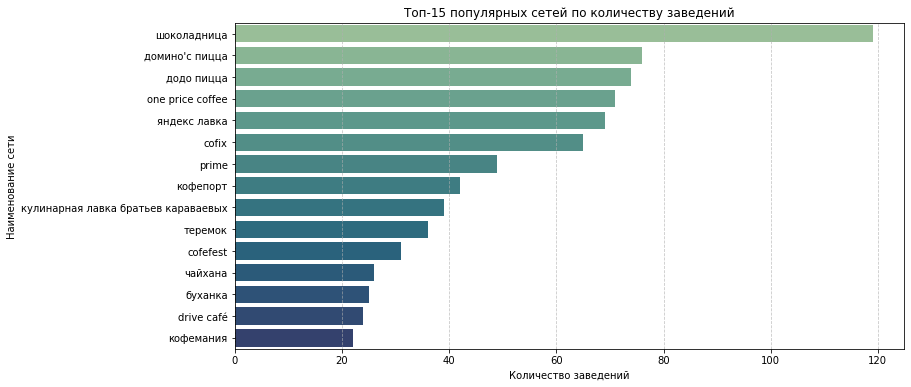

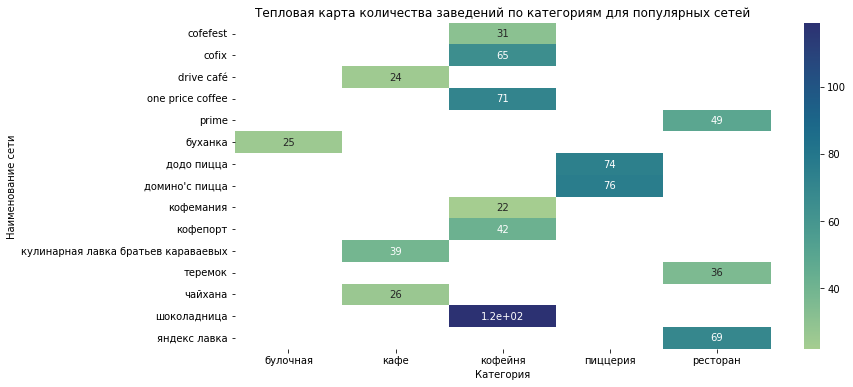

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count_by_name', 
            y=df_grouped_name.index.get_level_values('name'),
            data=df_grouped_name,
            palette="crest"
            )

plt.title('Топ-15 популярных сетей по количеству заведений')
plt.xlabel('Количество заведений')
plt.ylabel('Наименование сети')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Строим тепловую карту
pivot_data = df_grouped_name.pivot_table(index='name', columns='category', values='count_by_name', aggfunc='sum')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, annot=True, cmap='crest', cbar=True)

plt.title('Тепловая карта количества заведений по категориям для популярных сетей')
plt.xlabel('Категория')
plt.ylabel('Наименование сети')
plt.show()

В результате анализа были выделены 15 самых популярных сетей общественного питания в Москве по количеству заведений. Больше всего заведний в сети "шоколадница" - 119, замыкает топ-15 "кофемания" - 22 заведения.

На тепловой карте распределения количества заведений по категориям можно отметить, что среди топ-15 заведений категорию "булочная" представляет только одно заведение - "буханка". В то время, как в категории "кофейни" конкуренция выше - 6 заведений.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


Построим диаграммы размаха среднего чека в каждом районе Москвы.

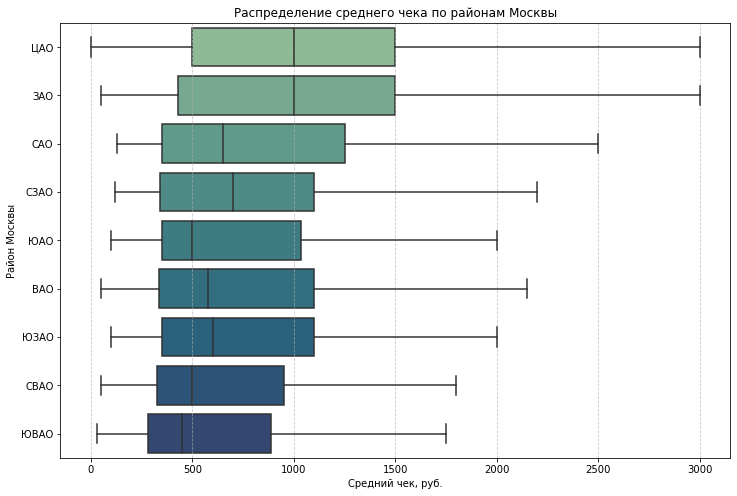

In [50]:
df_filtered_bill = df[df['middle_avg_bill'] != -10]
plt.figure(figsize=(12, 8))

# Вычисляем среднее значение среднего чека для каждого района
means = df.groupby('district_short')['middle_avg_bill'].mean().sort_values(ascending=False).index

# Построим диаграмму размаха, скрыв выбросы
sns.boxplot(data=df_filtered_bill, y='district_short', x='middle_avg_bill', palette='crest', order=means, showfliers=False)
plt.title('Распределение среднего чека по районам Москвы')
plt.ylabel('Район Москвы')
plt.xlabel('Средний чек, руб.')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Как видно из диаграммы самый высокий средний чек встречается в ЦАО, с небольшим отставанием идет ЗАО. Самые низкие средние чеки в СВАО и ЮВАО.

Рассмотрим зависимость среднего чека заведения от района Москвы и категории заведния. Построим тепловую карту.

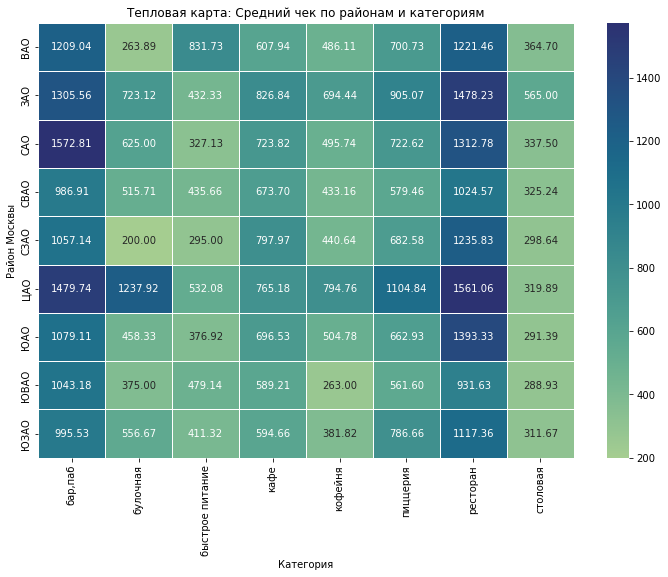

In [51]:
df_filtered_bill = df[df['middle_avg_bill'] != -10]

pivot_df = df_filtered_bill.pivot_table(values='middle_avg_bill', index='district_short', columns='category')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='crest', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Тепловая карта: Средний чек по районам и категориям')
plt.xlabel('Категория')
plt.ylabel('Район Москвы')
plt.show()

In [52]:
df_filtered_bill = df[df['middle_avg_bill'] != -10]
pivot_df = df_filtered_bill.pivot_table(values='middle_avg_bill', index='district_short', columns='category')

# Применяем градиент по строкам (axis=1)
styled_df = pivot_df.style.background_gradient(cmap='crest', axis=1).format("{:.2f}")

display(styled_df)

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
district_short,,,,,,,,
ВАО,1209.04,263.89,831.73,607.94,486.11,700.73,1221.46,364.70
ЗАО,1305.56,723.12,432.33,826.84,694.44,905.07,1478.23,565.00
САО,1572.81,625.00,327.13,723.82,495.74,722.62,1312.78,337.50
СВАО,986.91,515.71,435.66,673.70,433.16,579.46,1024.57,325.24
СЗАО,1057.14,200.00,295.00,797.97,440.64,682.58,1235.83,298.64
ЦАО,1479.74,1237.92,532.08,765.18,794.76,1104.84,1561.06,319.89
ЮАО,1079.11,458.33,376.92,696.53,504.78,662.93,1393.33,291.39
ЮВАО,1043.18,375.00,479.14,589.21,263.00,561.60,931.63,288.93
ЮЗАО,995.53,556.67,411.32,594.66,381.82,786.66,1117.36,311.67


По тепловой карте мы видим самые высокие чеки в ЦАО практически по многим категориям заведений. Самые дорогие рестораны, пиццерии, булочные, кофейни находятся в ЦАО. Немного отстаем по ценам ЗАО.

Дешевле всего поесть можно в ЮВАО - самые низкие цены в столовых, пиццериях, кофейнях относительно других районов.

---

### Задача 9

 При необходимости проведите исследования других данных и их взаимосвязи. Например, часы работы заведений или стоимость чашки кофе в зависимости от расположения или типа заведения.


Исследуем стоимость чашки кофе в зависимости от района и категории заведения. Построим тепловую карту.

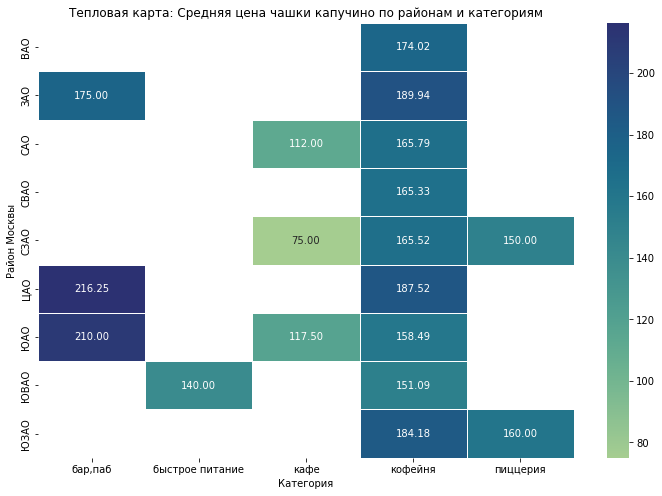

In [53]:
df_filtered_cup = df[df['middle_coffee_cup'] != -10]

pivot_df = df_filtered_cup.pivot_table(values='middle_coffee_cup', index='district_short', columns='category')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='crest', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Тепловая карта: Средняя цена чашки капучино по районам и категориям')
plt.xlabel('Категория')
plt.ylabel('Район Москвы')
plt.show()

Самую низкую цену за чашку кофе можно найти в кафе в СЗАО. В целом, в категории заведений "кафе" кофе стоит недорого.
Самый дорогой кофе в пабах и баравх, особенно ЦАО. Информации о цене кофе в ресторанах в имеющихся данных не представлено, к сожалению. Наиболее полно это поле ожидаемо представлено в категории "кофейни". Распределение средних цен на кофе по районом соответствует распределению среднего чека в целом по районам: самые низкие цены в ЮВАО, самые высокие в ЦАО и ЗАО.

---

### Промежуточный вывод


В результате анализа и визуализации данных удалось установить интресные взаимосвязи в данных.

В частности, связь среднего рейтинга заведений и района их нахождения, ценовой политики заведений. Самые высокие рейтинги и средние чеки имеют рестораны в ЦАО. Но в этом районе и количество завдений общепита более, чем в два раза превышает количество заведений в других районах.

## 4. Итоговый вывод и рекомендации

* 1. Общий обзор проделанной работы.

В ходе исследования был проведен анализ заведений общественного питания Москвы. Мы изучили распределение заведений по административным районам, исследовали популярность различных категорий, оценили долю сетевых и несетевых заведений, а также проанализировали средний рейтинг и количество посадочных мест. Визуализация данных с помощью гистограмм, столбчатых диаграмм и диаграмм размаха помогла выявить ключевые тенденции и закономерности.

* 2. Ответы на исследовательские вопросы, или главные выводы.

* Распределение заведений по районам: большинство заведений расположено в центральных районах Москвы, что объясняется высокой проходимостью и спросом. 
В отдаленных районах заведений значительно меньше.

* Популярные категории заведений: самыми распространенными категориями являются кафе, рестораны и кофейни.

* Доля сетевых и несетевых заведений: в большинстве категорий преобладают несетевые заведения, однако в категориях быстрого питания и кофеен сети часто встречаются

* Средний рейтинг заведений: средний рейтинг заведений имеет небольшой разброс, находится в диапазоне 4.05–4.39, что говорит об удовлетворенности качеством услуг со стороны посетителей.Самый высокий средний рейтинг у баров и пиццерий.
    Заведения быстрого питания имеют более низкие рейтинги, вероятно, из-за массового потока клиентов и возможных проблем с сервисом.

* Распределение посадочных мест: рестораны и столовые обладают самой большой посадочной емкостью, тогда как булочные и кофейни рассчитаны на ограниченное число посетителей. Выявлены выбросы — отдельные заведения с огромным числом посадочных мест (более 500 и даже более 1200), но они встречаются редко.

* 3. Рекомендации на основе анализа данных.

   Для открытия нового заведения стоит рассматривать центральные районы Москвы, где высокая проходимость и высокий средний чек. Однако стоит учесть высокую конкуренцию, т.к. ЦАО значительно обгоняет остальные районы по числу заведений.
   В ЦАО небольшое количество бюджетных заведений - булочных и столовых, конкуренция в этом сегменте будет ниже.
   В спальных районах может быть потенциал для небольших сетевых кафе и кофеен, с низким и умеренным средним чеком.
   В отдаленных районах средний рейтинг заведний ниже, что открывает перспективы по привлечению клиентов за счет повышенного качества обслуживания.
   Рестораны и кафе остаются востребованными, но требуют продуманной концепции из-за высокой конкуренции.
